# __Diffusion Kurtosis Imaging (DKI) analysis notebook__
#### __Last updated on:__ 27/02/2020
#### __Author:__ Rakshit Dadarwal

### __Requirements:__
#### 1. Multi-shell DWI dataset (minimum two bvalues)
#### 2. DIPY (https://dipy.org/)

### __This script includes:__
#### 1. DKI parametric maps estimation

### __Import python libraries__

In [1]:
import os
import nibabel as nib
import timeit; timeit.timeit()

from dipy.io import read_bvals_bvecs
from dipy.core.gradients import gradient_table
from dipy.reconst.dti import TensorModel
import dipy.reconst.dki as dki

### __Define DWI data path__

In [2]:
#--------------------------------------------------
# Pre-processed DWI data and brain mask
#--------------------------------------------------
data_path = "/home/erjun/Documents/dHCP/dhcp_dmri_pipeline/sub-CC00060XX03/ses-12501/dwi"
dwi_file = 'sub-CC00060XX03_ses-12501_desc-preproc_dwi.nii.gz'
brainmask_file = 'sub-CC00060XX03_ses-12501_desc-preproc_space-dwi_brainmask.nii.gz'
bval = 'sub-CC00060XX03_ses-12501_desc-preproc_dwi.bval'
bvec = 'sub-CC00060XX03_ses-12501_desc-preproc_dwi.bvec'

### __Post-processing__

In [3]:
# Change directory
os.chdir(data_path)

#--------------------------------------------------
# load DWI data files
#--------------------------------------------------
img1 = nib.load(os.path.join(data_path,dwi_file))
data = img1.get_data()

img2 = nib.load(os.path.join(data_path,brainmask_file))
brainmask = img2.get_data()

bvals, bvecs = read_bvals_bvecs(os.path.join(bval),
                                os.path.join(data_path,bvec))
gtab = gradient_table(bvals, bvecs)

#--------------------------------------------------------------
#               Fit diffusion kurtosis model 
#--------------------------------------------------------------
print('Fitting diffuison kurtosis model')
dkimodel = dki.DiffusionKurtosisModel(gtab)
dkifit = dkimodel.fit(data, brainmask)
        
#--------------------------------------------------------------
#               Save DKI parametric maps
#--------------------------------------------------------------
if not os.path.exists(data_path+'/DKI/'):
    os.mkdir(data_path+'/DKI')
data_path_saveImage = data_path+'/DKI/'
        
FA = dkifit.fa
MD = dkifit.md
RD = dkifit.rd
AD = dkifit.ad

MK = dkifit.mk(0, 3)
AK = dkifit.ak(0, 3)
RK = dkifit.rk(0, 3)
        
nib.save(nib.Nifti1Image(FA, img1.affine), os.path.join(data_path_saveImage,'dki_FA.nii.gz'))
nib.save(nib.Nifti1Image(MD, img1.affine), os.path.join(data_path_saveImage,'dki_MD.nii.gz'))
nib.save(nib.Nifti1Image(RD, img1.affine), os.path.join(data_path_saveImage,'dki_RD.nii.gz'))
nib.save(nib.Nifti1Image(AD, img1.affine), os.path.join(data_path_saveImage,'dki_AD.nii.gz'))
        
nib.save(nib.Nifti1Image(AK, img1.affine), os.path.join(data_path_saveImage,'AK.nii.gz'))
nib.save(nib.Nifti1Image(RK, img1.affine), os.path.join(data_path_saveImage,'RK.nii.gz'))
nib.save(nib.Nifti1Image(MK, img1.affine), os.path.join(data_path_saveImage,'MK.nii.gz'))
        
print('Elapsed time:',timeit.timeit())
print('Enjoy!!')

/home/erjun/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  
/home/erjun/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  # This is added back by InteractiveShellApp.init_path()


Fitting diffuison kurtosis model
Elapsed time: 0.0042010930046672
Enjoy!!


### __Plot output maps__

Text(0.5, 1.0, 'Mean kurtosis')

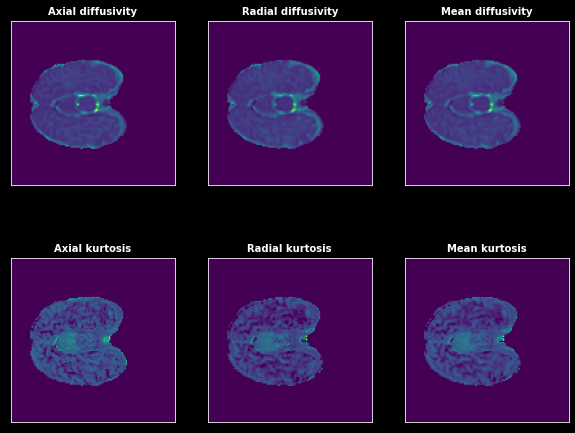

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# set plot background
plt.style.use('dark_background')

